# Loading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer

In [3]:
tracks = pd.read_csv('../fma_metadata/tracks.csv', header=[0,1], index_col=0, nrows=10000)

In [4]:
tracks.columns

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

In [5]:
tracks.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                        ...       track                         \
         producer tags  ... information interest language_code   
track_id                ...                                      
2             NaN   []  ...         NaN     4656            en   
3             NaN   []  ...         NaN     1470            en   
5             NaN   []  ...         NaN     1933            en   
10            NaN   []  ...         NaN    54881            en   
20            NaN   []  ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [6]:
tracks[('track','genres')].value_counts()

[12]            950
[15]            572
[17]            467
[21]            396
[25]            249
               ... 
[15, 182]         1
[17, 38, 41]      1
[36, 89, 98]      1
[2, 58, 169]      1
[12, 25, 32]      1
Name: (track, genres), Length: 555, dtype: int64

In [7]:
genres = pd.read_csv('../fma_metadata/genres.csv')

In [8]:
genres

,genre_id,#tracks,parent,title,top_level
0,1,8693,38,Avant-Garde,38
1,2,5271,0,International,2
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5
...,...,...,...,...,...
158,1032,60,102,Turkish,2
159,1060,30,46,Tango,2
160,1156,26,130,Fado,2
161,1193,72,763,Christmas,38


In [9]:
def sous_genres(genre):
    our_genre_id = genres[genres.title == genre].genre_id.to_list()[0]
    return genres[genres.parent == our_genre_id]

In [10]:
features = pd.read_csv('../fma_metadata/features.csv', header=[0,1,2], index_col=0, nrows = 10000)

In [11]:
features.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.095003  0.022492   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
20          0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  

[5 rows x 518 columns]

In [13]:
features.columns.to_frame().feature.unique()

array(['chroma_cens', 'chroma_cqt', 'chroma_stft', 'mfcc', 'rmse',
       'spectral_bandwidth', 'spectral_centroid', 'spectral_contrast',
       'spectral_rolloff', 'tonnetz', 'zcr'], dtype=object)

In [14]:
echonest = pd.read_csv('../fma_metadata/echonest.csv', header=[0,1,2], index_col=0, nrows = 1000)

In [15]:
echonest.echonest.dtypes[echonest.echonest.dtypes != 'float64']

metadata  album_date         object
          album_name         object
          artist_location    object
          artist_name        object
          release            object
dtype: object

In [16]:
echonest.head()

echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                                                        ...  \
                                           metadata                     ...   
         speechiness    tempo   valence  album_date         album_name  ...   
track_id                                                                ...   
2           0.159310  165.922  0.576661         NaN                NaN  ...   
3           0.461818  126.957  0.269240         NaN                NaN  ...   
5           0.124595  100.260  0.621661         NaN                NaN  ...   
10          0.032985  111.562  0.963590  2008-03-11  Constant Hitmaker  ...   
134         0.525519  114.290  0.894072         NaN                NaN  ...   

                                                                              \
         temporal_features                                                     
                       214        215       216       217       218      219   
track_id                                                                       
2                -1.992303   6.805694  0.233070  0.192880  0.027455  0.06408   
3                -1.582331   8.889308  0.258464  0.220905  0.081368  0.06413   
5                -2.288358  11.527109  0.256821  0.237820  0.060122  0.06014   
10               -3.662988  21.508228  0.283352  0.267070  0.125704  0.08082   
134              -1.452696   2.356398  0.234686  0.199550  0.149332  0.06440   

                                                     
                                                     
               220       221        222         223  
track_id                                             
2          3.67696   3.61288  13.316690  262.929749  
3          6.08277   6.01864  16.673548  325.581085  
5          5.92649   5.86635  16.013849  356.755737  
10         8.41401   8.33319  21.317064  483.403809  
134       11.26707  11.20267  26.454180  751.147705  

[5 rows x 249 columns]

# Viz Echonest

## plotting numerical features distribution

In [95]:
#feature groups and nb of features in each group
echonest_feature_groups = np.unique(np.array([col[0] for col in echonest.echonest.columns])).tolist()
echonest_feature_groups_counts = np.unique(np.array([col[0] for col in echonest.echonest.columns]), return_counts=True)[1].tolist()

In [96]:
print(echonest_feature_groups, echonest_feature_groups_counts)

['audio_features', 'metadata', 'ranks', 'social_features', 'temporal_features'] [8, 7, 5, 5, 224]


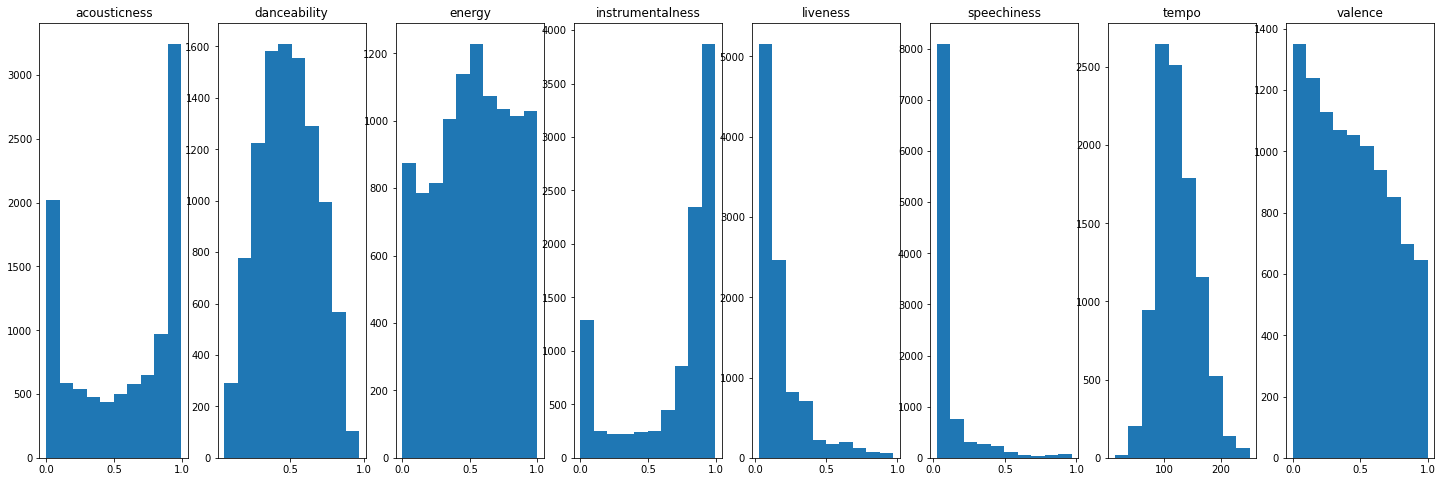

In [102]:
#plotting audio features
fig = plt.figure(figsize=(25,8))
i = 1
for feature in echonest.echonest.audio_features.columns:
        fig.add_subplot(1,len(echonest.echonest.audio_features.columns),i)
        plt.hist(echonest.echonest.audio_features[feature])
        plt.title(feature)
        i+=1

/home/achot/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/achot/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


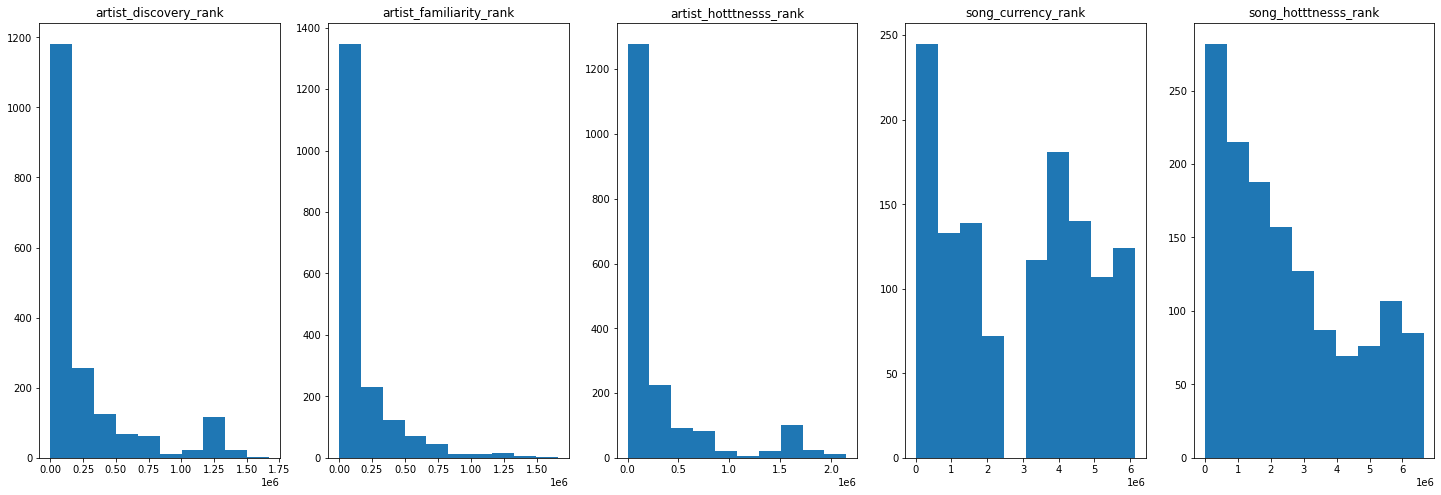

In [100]:
# plotting ranks features
fig = plt.figure(figsize=(25,8))
i = 1
for feature in echonest.echonest.ranks.columns:
        fig.add_subplot(1,len(echonest.echonest.ranks.columns),i)
        plt.hist(echonest.echonest.ranks[feature])
        plt.title(feature)
        i+=1

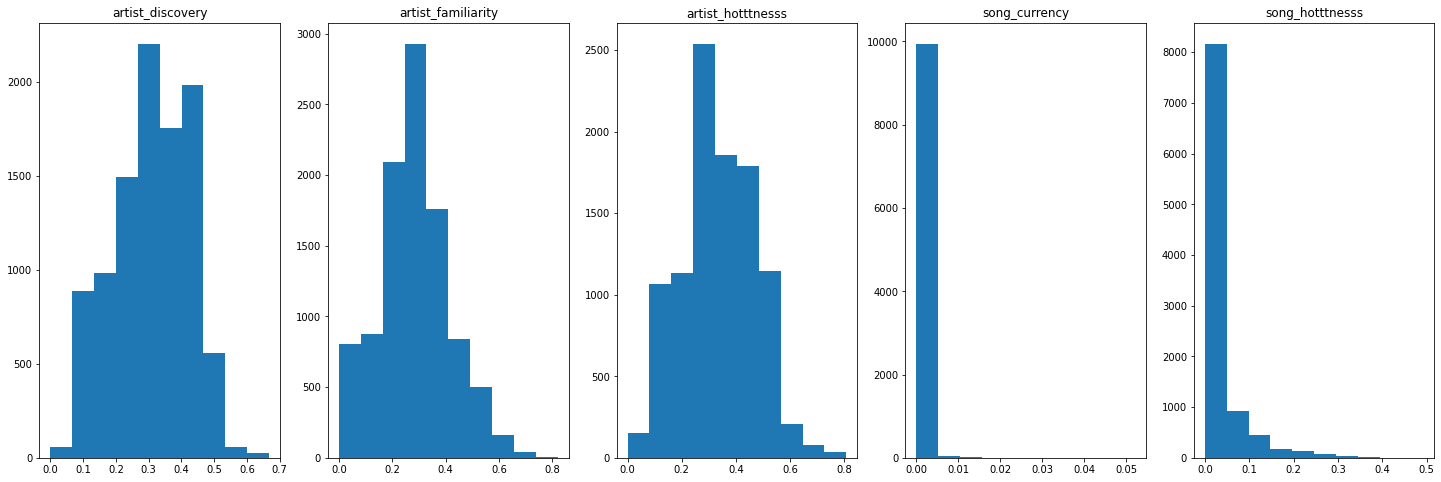

In [103]:
# plotting social features
fig = plt.figure(figsize=(25,8))
i = 1
for feature in echonest.echonest.social_features.columns:
        fig.add_subplot(1,len(echonest.echonest.social_features.columns),i)
        plt.hist(echonest.echonest.social_features[feature])
        plt.title(feature)
        i+=1

In [104]:
#describing temporal features
echonest.echonest.temporal_features.describe()

,000,001,002,003,004,005,006,007,008,009,...,214,215,216,217,218,219,220,221,222,223
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.452273,0.439833,0.365218,0.310518,0.367625,0.328387,0.335335,0.357972,0.325496,0.358875,...,-1.865261,9.628511,0.310770,0.256100,0.185143,0.068923,4.103556,4.034633,7.365838,133.759603
std,0.166556,0.168278,0.132407,0.120568,0.140968,0.125440,0.125506,0.129838,0.124241,0.134897,...,1.596151,17.621426,0.152797,0.087945,3.987928,0.011515,5.101015,5.100413,6.466571,230.987379
min,0.022635,0.020016,0.015581,0.014307,0.032791,0.014088,0.011858,0.024117,0.015987,0.019726,...,-14.660542,-1.759883,0.129023,0.098280,0.000518,0.060000,0.322180,0.224580,-3.566834,-1.687834
25%,0.334644,0.319023,0.274460,0.228604,0.268528,0.242018,0.248336,0.267005,0.237864,0.266248,...,-2.493722,1.120304,0.240808,0.208194,0.020464,0.063130,1.741175,1.670757,2.742352,14.049295
50%,0.450735,0.436179,0.356465,0.303132,0.354332,0.322125,0.328795,0.350321,0.317706,0.349276,...,-1.499423,4.024276,0.284286,0.241020,0.040281,0.064810,2.964945,2.897165,5.230414,49.912014
75%,0.565348,0.558886,0.442725,0.381538,0.451487,0.404469,0.412525,0.434889,0.402000,0.437955,...,-0.832879,10.464276,0.340259,0.286850,0.087414,0.070390,4.985525,4.913930,10.104151,164.250935
max,0.998426,0.985372,0.996535,0.990182,0.967532,0.950671,0.945478,0.991516,0.917841,0.939243,...,1.545966,274.052002,5.211423,1.680570,375.744781,0.342000,226.326767,226.244080,67.041878,4790.696777


# determine X and y

In [97]:
# creating a df without the 7 metadata columns that give information on the track such as artist location etc
# all other columns are floats
echonest_numerical = echonest.drop(columns=('echonest', 'metadata',))

In [129]:
X = echonest_numerical

In [132]:
# filling NaNs with median
imputer = SimpleImputer(strategy = 'median')
X_filled = pd.DataFrame(imputer.fit_transform(X))

In [134]:
scaler = StandardScaler()

In [140]:
X_scaled = pd.DataFrame(scaler.fit_transform(X_filled))

In [162]:
#setting y as the genre
y = tracks.track.genre_top

In [163]:
X_train = X[]

track_id
2        Hip-Hop
3        Hip-Hop
5        Hip-Hop
10           Pop
20           NaN
          ...   
16539        NaN
16540        NaN
16541        NaN
16542        NaN
16543        NaN
Name: genre_top, Length: 10000, dtype: object